# Compensation

The dataset is downloaded from http://appsso.eurostat.ec.europa.eu/nui/setupDownloads.do

## About Dataset

- The zip file contains 25 tables
- It contains many empty tables and duplicates
- I used the tables below
  - nama_10_lp_ulc_1_Data.csv: Compensation of employees per hour worked (Euro)
  - nama_10_lp_ulc_2_Data.csv: Compensation per employee (Euro)
  - nama_10_lp_ulc_10_Data.csv: Real labour productivity per person (Index, 2015=100)
- Compensation per hour worked and compensation per employee are highly correlated (0.99)

## Findings

- It contains data from 2010 to 2018
- It contains 34 countries' data
  - But 3 countries data is missing
  - In addition, 4 countries' data is missing in 2018
  - => 31 countries' time series data ranging from 2010 to 2017 is available

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import locale

In [2]:
data_raw_dir = '../data/raw'

def atof(value):
    if value == ':':
        return None
    return locale.atof(value.replace(',', ''))

def nantonone(flag):
    if flag == 'nan':
        return None
    return flag

def truncate(geo, limit=20):
    return (geo[:limit] + '..') if len(geo) > limit else geo

geos_to_exclude = [
    'European Union - 27 countries (from 2020)',
    'European Union - 28 countries (2013-2020)',
    'European Union - 15 countries (1995-2004)',
    'Euro area (EA11-1999, EA12-2001, EA13-2007, EA15-2008, EA16-2009, EA17-2011, EA18-2014, EA19-2015)',
    'Euro area - 19 countries  (from 2015)',
    'Euro area - 12 countries (2001-2006)',
    'Montenegro',
    'North  Macedonia',
    'Serbia']

country_name_dict = {
    'Germany (until 1990 former territory of the FRG)': 'Germany'
}
    
def normalize_country_name(name):
    if name in country_name_dict:
        return country_name_dict[name]
    else:
        return name

dfs = []
overview = []
for i in range(1,26):
    filename = f'nama_10_lp_ulc_{i}_Data.csv'
    df = pd.read_csv(f'{data_raw_dir}/{filename}')
    df = df[~df['GEO'].isin(geos_to_exclude)]
    df['TIME'] = df['TIME'].astype(int)
    df['GEO'] = df['GEO'].apply(normalize_country_name)
    df['Value'] = df['Value'].apply(atof)
    df['Flag and Footnotes'] = df['Flag and Footnotes'].apply(nantonone)
    dfs.append(df)
    
    na_item = ''.join(df['NA_ITEM'].unique())
    unit = ''.join(df['UNIT'].unique())
    value_null_rate = df['Value'].isna().mean().round(4) * 100
    flag_null_rate = df['Flag and Footnotes'].isna().mean().round(4) * 100
    overview.append({
        'filename': filename,
        'NA_ITEM': na_item,
        'UNIT': unit,
        'value_null_rate': value_null_rate,
        'flag_null_rate': flag_null_rate,
    })
overview_df = pd.DataFrame(overview)
display(overview_df)
display(overview_df['NA_ITEM'].unique().tolist())

,filename,NA_ITEM,UNIT,value_null_rate,flag_null_rate
0,nama_10_lp_ulc_1_Data.csv,Compensation of employees per hour worked,Euro,4.38,82.50
1,nama_10_lp_ulc_2_Data.csv,Compensation per employee,Euro,1.56,82.50
2,nama_10_lp_ulc_3_Data.csv,Nominal labour productivity per hour worked,Euro,100.00,100.00
3,nama_10_lp_ulc_4_Data.csv,Nominal labour productivity per person,Euro,100.00,100.00
4,nama_10_lp_ulc_5_Data.csv,Real labour productivity per person,Euro,100.00,100.00
5,nama_10_lp_ulc_6_Data.csv,Compensation of employees per hour worked,"Index, 2010=100",100.00,100.00
6,nama_10_lp_ulc_7_Data.csv,Compensation per employee,"Index, 2010=100",100.00,100.00
7,nama_10_lp_ulc_8_Data.csv,Nominal labour productivity per hour worked,"Index, 2010=100",100.00,100.00
8,nama_10_lp_ulc_9_Data.csv,Nominal labour productivity per person,"Index, 2010=100",100.00,100.00
9,nama_10_lp_ulc_10_Data.csv,Real labour productivity per person,"Index, 2010=100",1.25,79.06


['Compensation of employees per hour worked',
 'Compensation per employee',
 'Nominal labour productivity per hour worked',
 'Nominal labour productivity per person',
 'Real labour productivity per person']

In [3]:
compensation_per_hour_df = dfs[0]
compensation_per_hour_df.rename(columns={'Value': 'Compensation of employees per hour worked (Euro)'}, inplace=True)

compensation_per_employee_df = dfs[1]
compensation_per_employee_df.rename(columns={'Value': 'Compensation per employee (Euro)'}, inplace=True)

productivity_per_person_df = dfs[9]
productivity_per_person_df.rename(columns={'Value': 'Real labour productivity per person (Index, 2015=100)'}, inplace=True)

In [4]:
df = compensation_per_hour_df[['TIME', 'GEO', 'Compensation of employees per hour worked (Euro)']].copy()

df.rename(columns={
    'Compensation of employees per hour worked (Euro)': 'compensation',
}, inplace=True)

df = df.dropna()

df.head()

,TIME,GEO,compensation
60,2010,Belgium,34.3
61,2011,Belgium,35.1
62,2012,Belgium,36.2
63,2013,Belgium,37.2
64,2014,Belgium,37.6


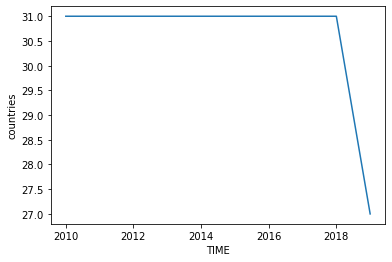

In [5]:
temp = df.groupby(['TIME'])['GEO'].nunique().reset_index(name='countries')
sns.lineplot(data=temp, x='TIME', y='countries')

In [6]:
temp = df[df['TIME'] == 2018].sort_values(by='compensation', ascending=False)
top_countries = temp.head(5)['GEO'].tolist()
worst_countries = temp.tail(5)['GEO'].tolist()
countries = top_countries + worst_countries
countries

['Switzerland',
 'Norway',
 'Luxembourg',
 'Iceland',
 'Denmark',
 'Lithuania',
 'Hungary',
 'Poland',
 'Romania',
 'Bulgaria']

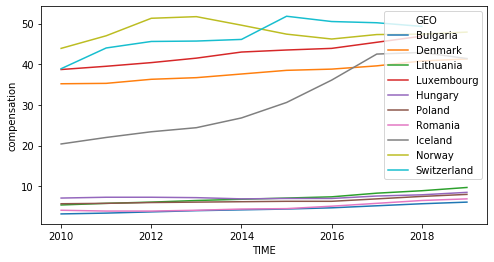

In [7]:
temp = df[df['GEO'].isin(countries)]
plt.figure(figsize=(8,4))
sns.lineplot(data=temp, x='TIME', y='compensation', hue='GEO')

In [8]:
shift_range = [1,2]
for feature in ['compensation']:
    for shift in shift_range:
        df[f'{feature}_shift_{shift}'] = df.sort_values('TIME').groupby(['GEO'])[feature].shift(shift)
        df[f'{feature}_diff_{shift}'] = df[f'{feature}_shift_{shift}'] - df[feature]
        
df = df[(2012 <= df['TIME']) & (df['TIME'] <= 2017)]

df.head()

,TIME,GEO,compensation,compensation_shift_1,compensation_diff_1,compensation_shift_2,compensation_diff_2
62,2012,Belgium,36.2,35.1,-1.1,34.3,-1.9
63,2013,Belgium,37.2,36.2,-1.0,35.1,-2.1
64,2014,Belgium,37.6,37.2,-0.4,36.2,-1.4
65,2015,Belgium,37.8,37.6,-0.2,37.2,-0.6
66,2016,Belgium,37.9,37.8,-0.1,37.6,-0.3


## Difference from the Last Year

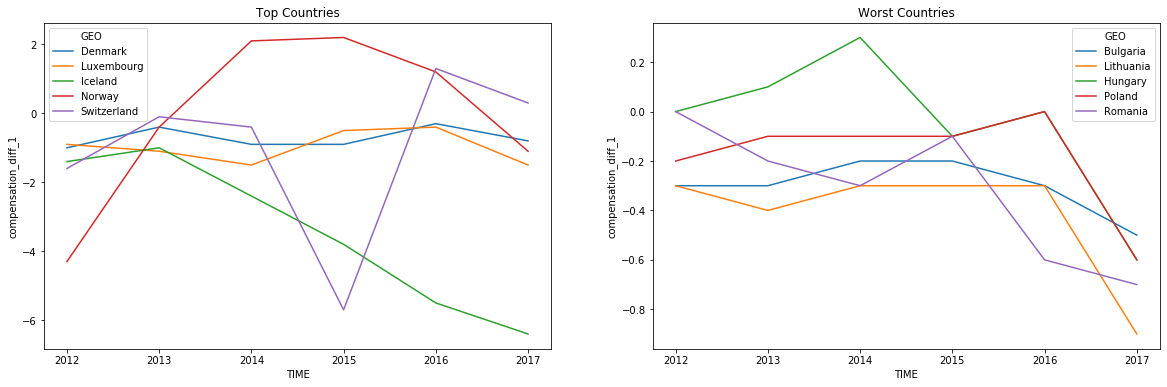

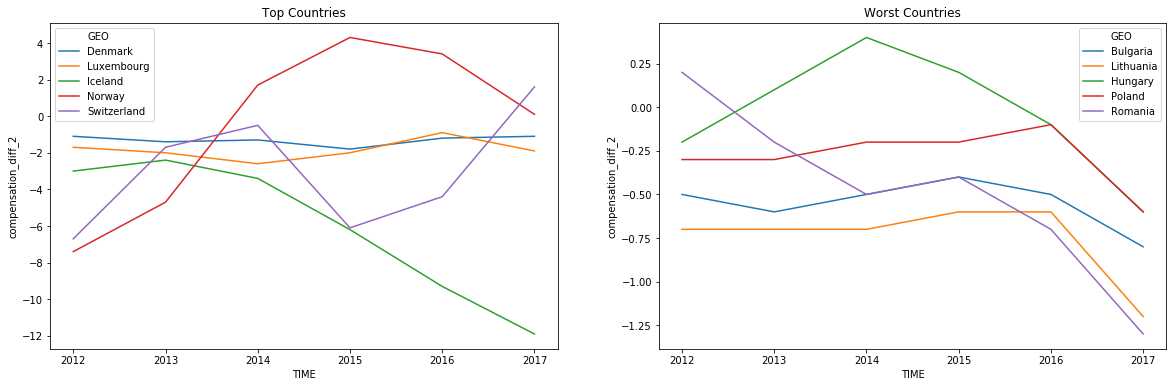

In [9]:
column = 'compensation_diff_1'
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
sns.lineplot(data=df[df['GEO'].isin(top_countries)], x='TIME', y=column, hue='GEO', ax=axes[0])
axes[0].set_title('Top Countries')
sns.lineplot(data=df[df['GEO'].isin(worst_countries)], x='TIME', y=column, hue='GEO', ax=axes[1])
axes[1].set_title('Worst Countries')
plt.show()

column = 'compensation_diff_2'
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
sns.lineplot(data=df[df['GEO'].isin(top_countries)], x='TIME', y=column, hue='GEO', ax=axes[0])
axes[0].set_title('Top Countries')
sns.lineplot(data=df[df['GEO'].isin(worst_countries)], x='TIME', y=column, hue='GEO', ax=axes[1])
axes[1].set_title('Worst Countries')
plt.show()